In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import cv2
from PIL import Image
from skimage.filters import threshold_otsu
from skimage.morphology import area_opening, disk, binary_closing
from skimage.measure import find_contours, label
from skimage.color import rgb2gray, label2rgb

In [172]:
image = cv2.imread('C:/Users/Lenovo/Downloads/c2.jpg')
img = Image.fromarray(image)
img.mode

'RGB'

In [127]:
# # cv2.imshow("RGB Image", image)
# plt.imshow(image)
# plt.show()

In [48]:
img_copy = np.copy(image)

In [49]:
# img_copy

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [61]:
# img_copy.shape

(723, 1047, 3)

In [173]:
black_img_copy = np.copy(image)

black_img_copy[(black_img_copy[:, :, 0] > 40) & (black_img_copy[:, :, 1] > 35) & (black_img_copy[:, :, 2] > 10)] = 255


In [148]:
white_img_copy = np.copy(image)
white_img_copy[(white_img_copy[:, :, 0] < 118) & (white_img_copy[:, :, 1] < 103) & (white_img_copy[:, :, 2] < 82)] = 255

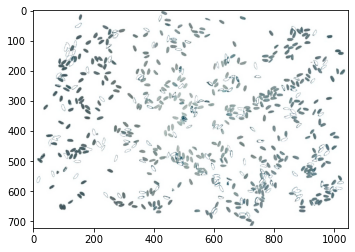

In [139]:
img = Image.fromarray(white_img_copy)

plt.imshow(img) 
plt.show()

In [10]:
# black_img_copy[(black_img_copy[:, :, 0] < 75) & (black_img_copy[:, :, 1] < 65) & (black_img_copy[:, :, 2] < 25)] = 0

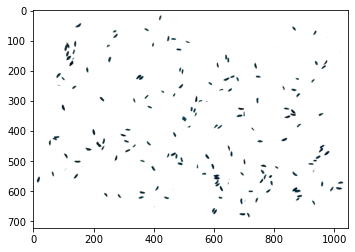

In [11]:
# img = Image.fromarray(black_img_copy)

# plt.imshow(img)
# plt.show()

In [9]:
black_img_copy

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
# black_img_copy[(black_img_copy[:, :, 0] <= 10) & (black_img_copy[:, :, 1] <= 10) & (black_img_copy[:, :, 2] <= 10)] = 255
# black_img_copy[(black_img_copy[:, :, 0] >= 250) & (black_img_copy[:, :, 1] >= 250) & (black_img_copy[:, :, 2] >= 250)] = 0

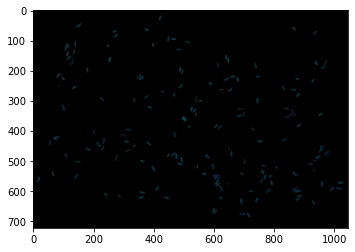

In [14]:
# img = Image.fromarray(black_img_copy)

# plt.imshow(img)
# plt.show()

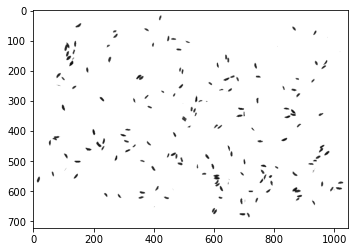

In [174]:
# gray = cv2.cvtColor(black_img_copy, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(black_img_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [175]:
gray = area_opening(gray, area_threshold=1700, connectivity=2)

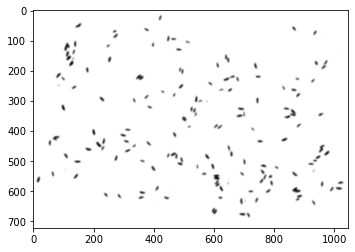

In [176]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

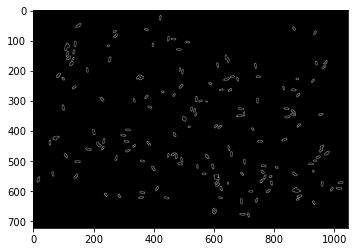

In [177]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

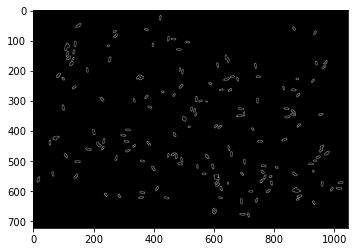

In [169]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

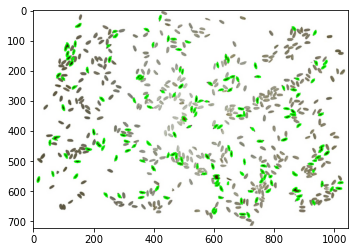

In [178]:
(cnt, hierarchy) = cv2.findContours(
    canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  
plt.imshow(rgb)

In [179]:
print("coins in the image : ", len(cnt))

coins in the image :  170


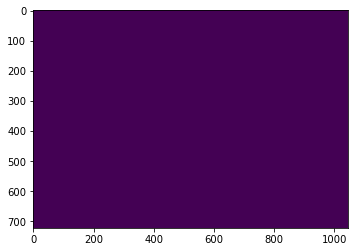

In [18]:
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()

In [19]:
# Segment seeds using a global automated threshold
global_thresh = threshold_otsu(gray)
image_binary = gray > global_thresh

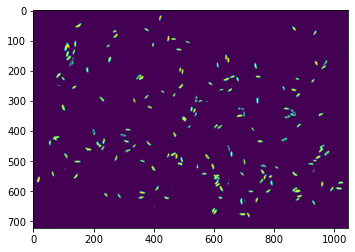

In [20]:
plt.imshow(image_binary)
plt.show()

In [24]:
# Invert image
image_binary = ~image_binary

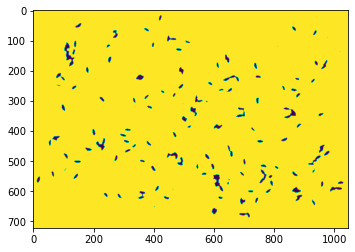

In [25]:
plt.imshow(image_binary)
plt.show()

In [26]:
# Remove small areas (remove noise)
image_binary = area_opening(gray, area_threshold=1700, connectivity=2)

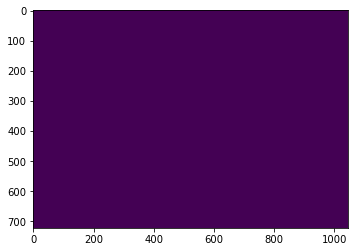

In [27]:
plt.imshow(image_binary)
plt.show()

In [21]:
# Closing (performs a dilation followed by an erosion. Connect small bright patches)
image_binary = binary_closing(image_binary, disk(5))

# Let's inspect the structuring element
print(disk(5))

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


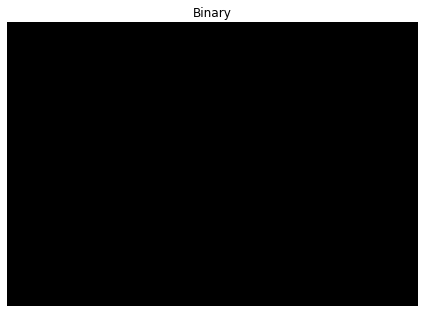

In [113]:
# Display inverted and denoised binary image
plt.figure(figsize=(6,6))

plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.title('Binary')
plt.tight_layout()

plt.show()

In [22]:
# Identify seed boundaries
contours = find_contours(image_binary, 1)

# Print number of seeds in image
print('Image contains',len(contours),'seeds')

Image contains 0 seeds


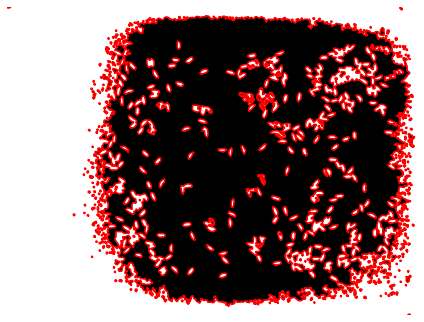

In [58]:
# Plot seed contours
plt.figure(figsize=(6,6))
plt.imshow(image_binary, cmap='gray')
plt.axis('off')
plt.tight_layout()

for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], '-r', linewidth=1.5)
    

In [17]:
# connected components - counts and marks number of distinct foreground objects
# apply connected components on clean binary image
# (in this case - output of morphological opening operation)
label_image = output_opening.copy()
label_count = 0
rows, cols = label_image.shape
for j in range(rows):
    for i in range(cols):
        pixel = label_image[j, i]
        if 255 == pixel:
            label_count += 1
            cv.floodFill(label_image, None, (i, j), label_count)

print("Number of foreground objects", label_count)
cv.imshow("Connected Components", label_image)
cv.imwrite('output/rice_components.png', label_image)

Number of foreground objects 100


False

In [18]:
# Contours - Computes polygonal contour boundary of foreground objects
# apply connected components on clean binary image
_, contours, _ = cv.findContours(output_opening, cv.RETR_EXTERNAL,  cv.CHAIN_APPROX_SIMPLE)
output_contour = cv.cvtColor(output_opening, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (0,0,255), 2)
print("Number of detected contours", len(contours))
cv.imshow("Contours", output_contour)
cv.imwrite('output/rice_contours.png', output_contour)

ValueError: not enough values to unpack (expected 3, got 2)

In [19]:
# region growing - segments image starting from seed points iteratively
# apply region growing on lung CT image
output_regiongrow = input_lungCT.copy()
cv.floodFill(output_regiongrow, None, (265, 225), (0, 64, 192), (4, 4, 4), (5, 5, 5))
cv.imshow("Region Growing", output_regiongrow)
cv.imwrite('output/lungCT_regiongrow.png', output_contour)

NameError: name 'output_contour' is not defined

In [ ]:
# wait for key press
cv.waitKey(0)
cv.destroyAllWindows()